In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(style="ticks", color_codes=True)

from DataReader import readDataFromJson, readDataFromEmbedding

In [2]:
hyper_config = {
    'dataset'          : 'disease',
}
config = {
    'dict'             : './sbert_en_disease_train/dict',   
    'train_embed_dir'  : 'sbert_en_disease_train',
    'dev_embed_dir'    : 'sbert_en_disease_dev',

    'use_tfidf'        : False,
    'sen_emd_model'    : 'naive-bert',
    'logging_path'     : './logging/naiveBERT_biLSTM_en_{}_model.log'.format(hyper_config['dataset']),
    'modelName'        : '../models/naiveBERT_biLSTM_en_{}_model.pt'.format(hyper_config['dataset']),    
    'train_json_file'  : '../dataset/WikiSection/wikisection_en_{}_train.json'.format(hyper_config['dataset']),
    'dev_json_file'    : '../dataset/WikiSection/wikisection_en_{}_validation.json'.format(hyper_config['dataset']),
    'test_json_file'   : '../dataset/WikiSection/wikisection_en_{}_test.json'.format(hyper_config['dataset'])
}

In [3]:
train_doc, label2idx, idx2label = readDataFromJson(config['train_json_file'], part = 1.0)
dev_doc, label2idx, idx2label   = readDataFromJson(config['dev_json_file'], i2l= idx2label, l2i=label2idx, part = 1.0)
test_doc, label2idx, idx2label   = readDataFromJson(config['test_json_file'], i2l= idx2label, l2i=label2idx, part = 1.0)

3%|▎         | 73/2513 [00:00<00:06, 356.61it/s]
####Reading data from JSON file####
 11%|█         | 39/359 [00:00<00:00, 379.91it/s]
####Reading data from JSON file####
  4%|▍         | 27/718 [00:00<00:02, 268.46it/s]
####Reading data from JSON file####
100%|██████████| 718/718 [00:01<00:00, 391.37it/s]


In [67]:
numLabels = []
Labels = []
source = []

for _,label in train_doc:
    numLabels.extend(label)
    Labels.extend([idx2label[idx] for idx in label])
    source.extend(['Train'] * len(label))

for _,label in dev_doc:
    numLabels.extend(label)
    Labels.extend([idx2label[idx] for idx in label])
    source.extend(['Dev'] * len(label))

for _,label in test_doc:
    numLabels.extend(label)
    Labels.extend([idx2label[idx] for idx in label])
    source.extend(['Test'] * len(label))

df = {'numLabels':numLabels, 'Labels':Labels, 'source':source}
data = pd.DataFrame(df)

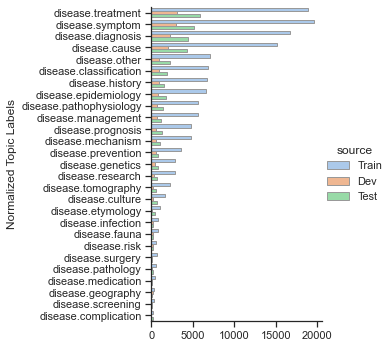

In [68]:
plot = sns.catplot(y="Labels", hue="source", kind="count",
            order=data.Labels.value_counts().index,
            palette="pastel", edgecolor=".6",data=data)
plot.set(xlabel='', ylabel='Normalized Topic Labels')
plot.savefig('../pic/disease_dist.pdf')  # pdf format is more clear

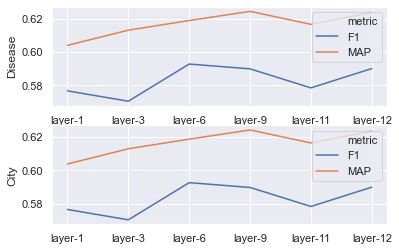

In [31]:
### for diff layers of BERT
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
dis_layers  = pd.read_csv('../dis_layers.csv')
city_layers = pd.read_csv('../dis_layers.csv')
f, axes = plt.subplots(2)
plot1 = sns.lineplot(x="Layers", y="res", hue ='metric', data=dis_layers, sort=False,ax=axes[0])
plot1.set_xlabel('')
plot1.set_ylabel('Disease')
plot2 = sns.lineplot(x="Layers", y="res", hue ='metric', data=city_layers, sort=False,ax=axes[1])
plot2.set_xlabel('')
plot2.set_ylabel('City')
plt.savefig('../pic/bert_layers.pdf')  # pdf format is more clear

In [44]:
dis_layers

,Unnamed: 0,Labels,Accuracy,Model
0,0.0,symptom,0.81,Word2vec
1,1.0,epidemiology,0.78,Word2vec
2,2.0,diagnosis,0.78,Word2vec
3,3.0,treatment,0.76,Word2vec
4,4.0,history,0.73,Word2vec
...,...,...,...,...
76,NaN,tomography,0.01,BERT
77,NaN,infection,0.00,BERT
78,NaN,geography,0.00,BERT
79,NaN,medication,0.00,BERT


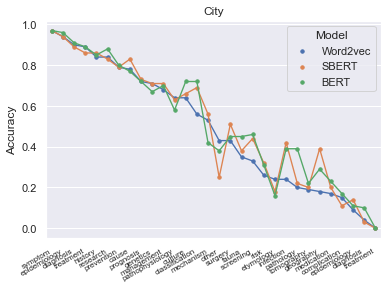

In [64]:
## for diff category vis
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
dis_layers  = pd.read_csv('../dis_category.csv')
city_layers = pd.read_csv('../city_category.csv')
plot = sns.pointplot(x="Labels", y="Accuracy", hue ='Model', data=city_layers, sort=False, scale=0.5)
plot.set_title('City')
plot.set_xlabel('')
plot.set_ylabel('Accuracy')
plot.tick_params(axis='x', labelsize=8)
plt.xticks(plt.xticks()[0], dis_layers.Labels, rotation=30, ha='right')
# plot2 = sns.lineplot(x="Labels", y="Accuracy", hue ='Model', data=city_layers, sort=False)
# plot2.set_xlabel('')
# plot2.set_ylabel('')
plt.savefig('../pic/city_categories.pdf')  # pdf format is more clear